In [1]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.google.com/search'

payload = {
    'q': '1101'
}

headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

response = requests.get(url, params=payload, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

[<div id="cst"><style>.y,.yp,.yf,.yi,.yl,.ye{}.z1asCe{display:inline-block;fill:currentColor;height:24px;line-height:24px;position:relative;width:24px}.z1asCe svg{display:block;height:100%;width:100%}.s2er{}.s2ml{}.s2ra{}.spch{}.spchc{}.spch-dlg{background:transparent;border:none}.spch{background:#fff;height:100%;left:0;opacity:0;overflow:hidden;position:fixed;text-align:left;top:0;visibility:hidden;width:100%;z-index:10000;transition:visibility 0s linear 0.218s,background-color 0.218s}.close-button{background:none;border:none;color:#777;cursor:pointer;font-size:26px;right:0;height:11px;line-height:15px;margin:15px;opacity:.6;padding:0;position:absolute;top:0;width:15px;z-index:10}.close-button:hover{opacity:.8}.close-button:active{opacity:1}.spchc{display:block;height:42px;position:absolute;pointer-events:none}.inner-container{height:100%;opacity:.1;pointer-events:none;width:100%;transition:opacity .318s ease-in}.s2ml .inner-container,.s2ra .inner-container,.s2er .inner-container{opac
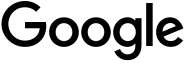
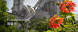
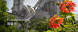

In [2]:
soup.find_all('div')

In [3]:
soup.find_all('div', {'class': 'kno-rdesc'})

[<div class="kno-rdesc" jsaction="sngtp:c0XUbe;tp_btn:c0XUbe;rcuQ6b:npT2md" jscontroller="DGEKAc"><div><h2 class="bNg8Rb">說明</h2><span>台灣水泥股份有限公司是台灣一家以水泥生產為主的礦業公司，始創於1946年5月，其歷史可追溯至日治時期；成立之初為公營事業，1954年11月起轉移民營化，由鹿港辜家接手經營。主要業務包括水泥、紙袋、紙張等生產和貿易，以「品牌水泥」為水泥品牌。</span><span><span> </span><a class="q ruhjFe NJLBac fl" data-ved="2ahUKEwjIsqiE7K3oAhWQc3AKHbrUALkQmhMwDXoECBIQEw" href="https://zh.wikipedia.org/zh-tw/%E5%8F%B0%E7%81%A3%E6%B0%B4%E6%B3%A5" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://zh.wikipedia.org/zh-tw/%25E5%258F%25B0%25E7%2581%25A3%25E6%25B0%25B4%25E6%25B3%25A5&amp;ved=2ahUKEwjIsqiE7K3oAhWQc3AKHbrUALkQmhMwDXoECBIQEw">維基百科</a></span></div></div>]

In [4]:
div_list = soup.find_all('div', {'class': 'kno-rdesc'})

In [7]:
div_list[0].span.text

'台灣水泥股份有限公司是台灣一家以水泥生產為主的礦業公司，始創於1946年5月，其歷史可追溯至日治時期；成立之初為公營事業，1954年11月起轉移民營化，由鹿港辜家接手經營。主要業務包括水泥、紙袋、紙張等生產和貿易，以「品牌水泥」為水泥品牌。'

In [12]:
soup.select('div.kno-rdesc span')[0].text

'台灣水泥股份有限公司是台灣一家以水泥生產為主的礦業公司，始創於1946年5月，其歷史可追溯至日治時期；成立之初為公營事業，1954年11月起轉移民營化，由鹿港辜家接手經營。主要業務包括水泥、紙袋、紙張等生產和貿易，以「品牌水泥」為水泥品牌。'

In [15]:
soup.select('div.kno-rdesc a')[0].get('href')

'https://zh.wikipedia.org/zh-tw/%E5%8F%B0%E7%81%A3%E6%B0%B4%E6%B3%A5'

In [16]:
from bs4 import BeautifulSoup
import requests
import time

url = 'https://www.google.com/search'

headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

stock_id_list = ['1101', '1102', '1103']

def get_stock_info(stock_id):
    payload = {
        'q': stock_id
    }
    
    response = requests.get(url, params=payload, headers=headers)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.text, 'lxml')
    
    description = soup.select('div.kno-rdesc span')[0].text
    link = soup.select('div.kno-rdesc a')[0].get('href')
    
    print(description)
    print(link)
    
    
for stock_id in stock_id_list:
    
    try:
        get_stock_info(stock_id)
    except Exception as err:
        print('{}失敗：{}'.format(stock_id, err))
        
    print('-'*20)
    time.sleep(3)
    

台灣水泥股份有限公司是台灣一家以水泥生產為主的礦業公司，始創於1946年5月，其歷史可追溯至日治時期；成立之初為公營事業，1954年11月起轉移民營化，由鹿港辜家接手經營。主要業務包括水泥、紙袋、紙張等生產和貿易，以「品牌水泥」為水泥品牌。
https://zh.wikipedia.org/zh-tw/%E5%8F%B0%E7%81%A3%E6%B0%B4%E6%B3%A5
--------------------
亞洲水泥，簡稱亞泥，為遠東集團旗下水泥企業，1957年3月21日成立，董事長為徐旭東。
https://zh.wikipedia.org/zh-tw/%E4%BA%9E%E6%B4%B2%E6%B0%B4%E6%B3%A5
--------------------
嘉新水泥，簡稱嘉泥，台灣公司，以生產水泥為主，創立於1954年，創辦人為張敏鈺。為嘉新水泥集團核心公司，總部位於臺北市中山區中山北路二段96號嘉新大樓。
https://zh.wikipedia.org/zh-tw/%E5%98%89%E6%96%B0%E6%B0%B4%E6%B3%A5
--------------------
